## Imports

In [5]:
import matplotlib.pyplot as plt

# ploting style
import mplhep as hep
plt.style.use(hep.style.ATLAS)
plt.rcParams['legend.loc'] = 'upper left'
figsize = (7, 7)
colors = plt.get_cmap('tab10')

# functions to process data
from performance.utils import process_csv_dir

INPUT_DIR = "data/main_traccc_nom/"
OUPUT_DIR = INPUT_DIR

cpu_data_instances, gpu_data_instances = process_csv_dir(INPUT_DIR)

TITLE = r"1 NVIDIA A100 SXM4 40GB, ODD detector, $\mu = 200$, traccc e7a03e9"

## Process Data

In [6]:
data = gpu_data_instances
instances = sorted(data.keys())

throughputs = []
gpu_util = []
gpu_memory_util = []

for inst in instances:
    tmp_data = data[inst][data[inst]['Concurrency'] == inst]
    throughputs.append(tmp_data['Inferences/Second'].values[0])
    gpu_util.append(tmp_data['total_gpu_usage'].values[0])
    gpu_memory_util.append(tmp_data['percent_gpu_memory'].values[0])

## Plot Memory Utilization

Text(0, 1, 'GPU Memory Utilization (%)')

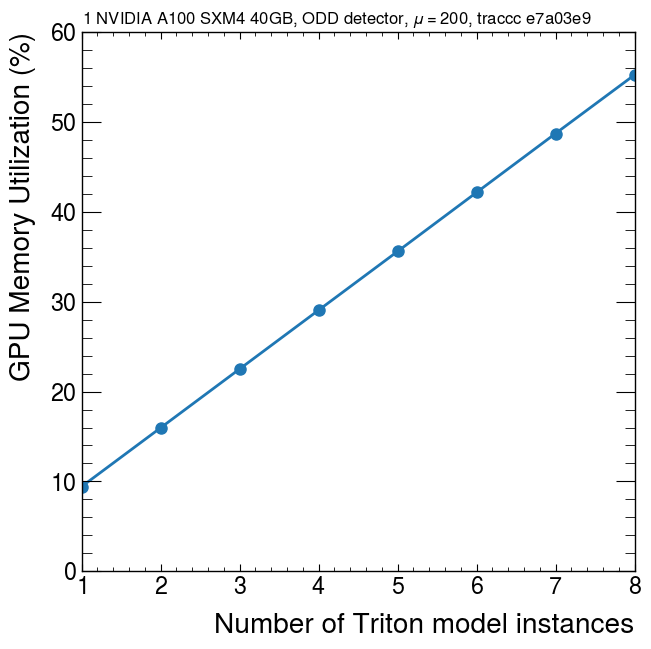

In [7]:
fig1 = plt.figure(figsize=figsize)
plt.plot(instances, gpu_memory_util, label='Throughput', marker='o', color=colors(0))
plt.title(TITLE, loc='left', fontsize=12)
plt.xlabel('Number of Triton model instances')
plt.ylabel('GPU Memory Utilization (%)')


## Plot Performance

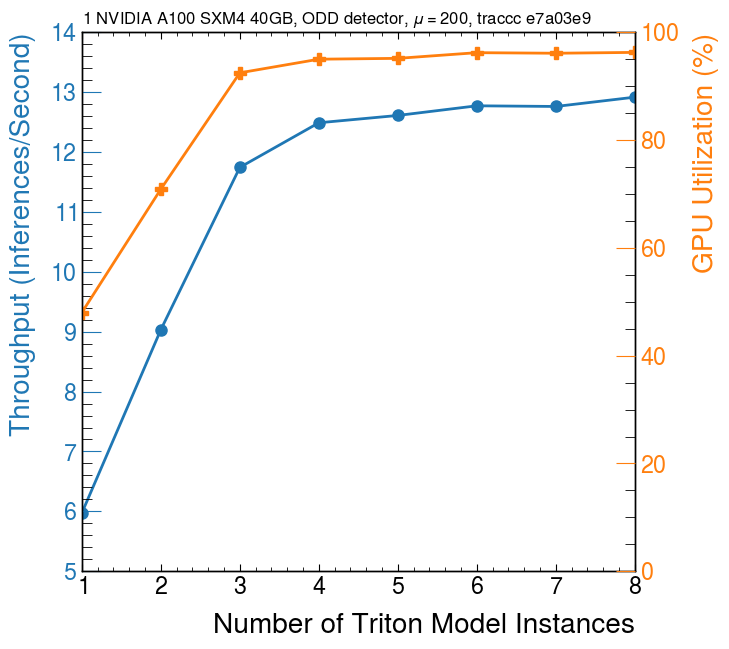

In [8]:
fig2, ax1 = plt.subplots(figsize=figsize)

# Throughput axis
ax1.plot(instances, throughputs, label='Throughput', marker='o', color=colors(0))
ax1.set_xlabel('Number of Triton Model Instances')
ax1.set_ylabel('Throughput (Inferences/Second)')
ax1.set_title(TITLE, loc='left', fontsize=12)
ax1.yaxis.label.set_color(colors(0))
ax1.tick_params(axis='y', colors=colors(0))

# share y-axis
ax2 = ax1.twinx()

# GPU Utilization axis
ax2.plot(instances, gpu_util, label='GPU Utilization', marker='P', color=colors(1))
ax2.set_ylabel('GPU Utilization (%)')
ax2.set_ylim(0, 100)
ax2.yaxis.label.set_color(colors(1))
ax2.tick_params(axis='y', colors=colors(1))


## Save

In [9]:
fig1.savefig(f"{OUPUT_DIR}/gpu_memory_util.pdf", bbox_inches='tight')
fig2.savefig(f"{OUPUT_DIR}/gpu_util_throughput.pdf", bbox_inches='tight')